# Introduction
- an approach to ML characterized by deep stacks of computations -> disentangle kinds of complex and hierarchical patterns
- Neural networks: composed of neurons
## The Linear Unit
- a neuron : y = wx + b
  - input: x; its weight = w
  - b: bias: enables neuron to modify the output independently
  - y = value the neuron ultimately outputs.
- single neuron models are linear models

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

- units: how many ouput we want (ex: calories)
- input_shape: ensure the model accept 3 features as input ('sugars', 'fiber' and 'protein')

In [2]:
w,b = model.weights

# Deep Neural Networks
## Layers
- when collect together linear units having common set of inputs we get a dense layer
## Activation Function
- function applied to a layer's outputs. Most common - rectifier function max(0,x)
  -> Rectified linear unit or ReLU
- the output become max(0, w*x+b)

## Stacking Dense Layers
- final layer is a linear unit, no activation function
- Other task like classification might require an activation function on the output

In [3]:
model = keras.Sequential([
    #the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    #the linear output layer
    layers.Dense(units=1),
])

# Stochastic Gradient Descent
- loss function: measure how good the network's prediction; the disparity between target's true value and the predicted value (ex: MAE, MSE, Huber loss)
- optimizer: tell the network how to change its weight (Stochastic Gradient Descent)
  - step 1: sample some training data, run it through the network
  - step 2: measure the loss
  - step 3: adjust the weights that loss smaller
- each iteration's sample - minibatch or just 'batch'
- complete round of training data: epoch. the number of epoch = how many times the network see each training example


---


- Adam: an SGD algorithm that has adaptive learning rate

In [4]:
# Adding the Loss and Optimizer
model.compile(
    optimizer="adam",
    loss="mae",
)

# Example: Red wine quality

In [5]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')

#Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

#Scale to [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train-min_)/(max_ -min_)
df_valid = (df_valid-min_)/(max_-min_)

#Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
print(X_train.shape)

(1119, 11)


In [6]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

In [7]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 2s 132ms/step - loss: 0.2897 - val_loss: 0.1394
Epoch 2/10
5/5 [==============================] - 0s 60ms/step - loss: 0.1428 - val_loss: 0.1260
Epoch 3/10
5/5 [==============================] - 0s 38ms/step - loss: 0.1269 - val_loss: 0.1177
Epoch 4/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1136 - val_loss: 0.1081
Epoch 5/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1087 - val_loss: 0.1077
Epoch 6/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1062 - val_loss: 0.1045
Epoch 7/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1059 - val_loss: 0.1049
Epoch 8/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1036 - val_loss: 0.1108
Epoch 9/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1037 - val_loss: 0.1008
Epoch 10/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1013 - val_loss: 0.1010


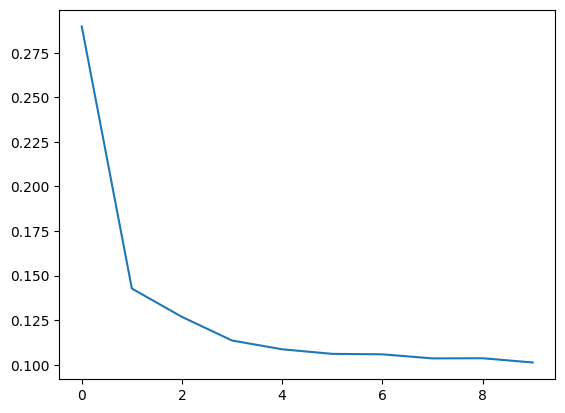

In [9]:
#covert the training history to a dataframe
history_df = pd.DataFrame(history.history)

#use Pandas native plot method
history_df['loss'].plot();

# Overfitting and Underfitting

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimum amount of change to count as an improvement
    patience=20, #how many epochs to wait before stopping
    restore_best_weights=True,
)
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.09429935365915298


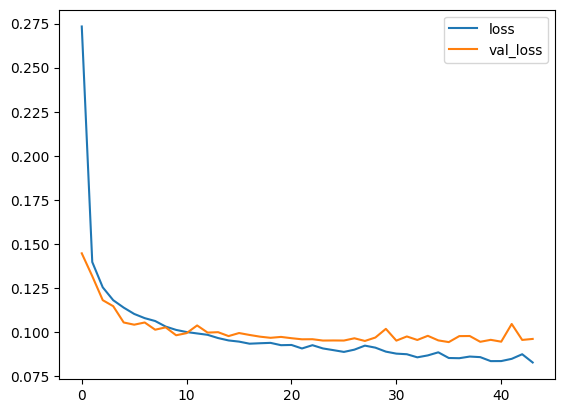

In [11]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid,y_valid),
    batch_size=256, epochs=500,
    callbacks=[early_stopping], #put your callbacks in a list
    verbose=0 #turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

#Dropout and Batch Normalization
##Dropout layer
- help correct overfitting
- randomly drop out some fraction of a layer's input units
- The predictions no longer be made by one big network but a committee of smaller networks

In [ ]:
kera.Sequential([
    # ...
    layers.Dropout(rate=0.3), #apply 30% dropout to the next layer
    layers.Dense(16),
    #....
])

## Batch Normalization
- help correct training that slow or unstable
- A batch normalization layer looks at each batch, first **normalizing** the batch with its own **mean** and **standard deviation**, then put the data on a **new scale** with **2 trainable rescaling parameters**

In [ ]:
layers.BatchNormalization(),

In [12]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [16]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

<ipython-input-16-dc8b72943de1>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


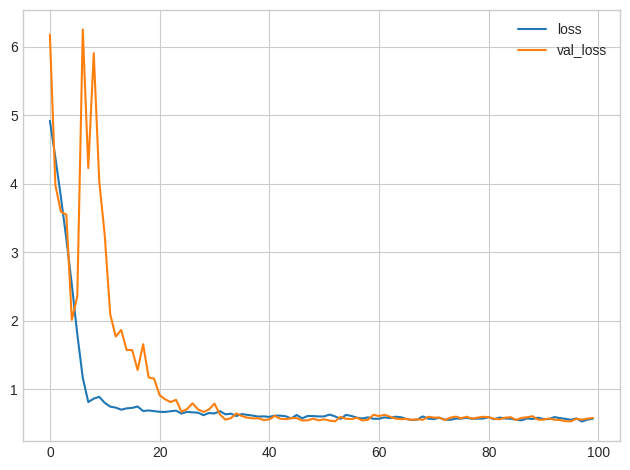

In [17]:
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

# Binary Classification
- Accuracy = number_correct/ total
- Accuracy cant used as a loss function -> loss-entropy function
- Cross-entropy: measure distance between probability

## Sigmoid function
- threshold probability: typically 0.5

In [19]:
# Set up
import pandas as pd
from IPython.display import display

ion = pd.read_csv('ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [22]:
early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.3275
Best Validation Accuracy: 0.9048


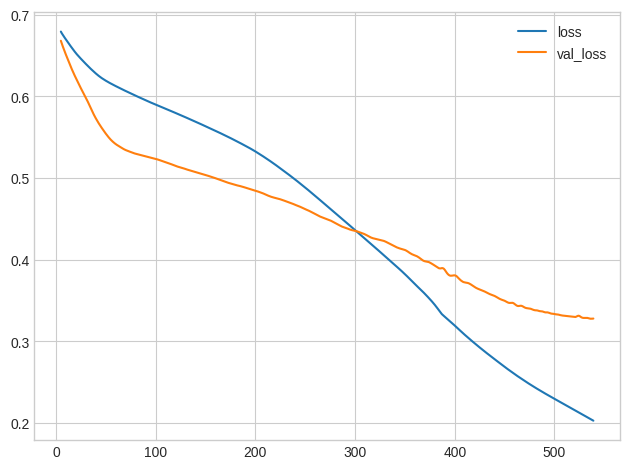

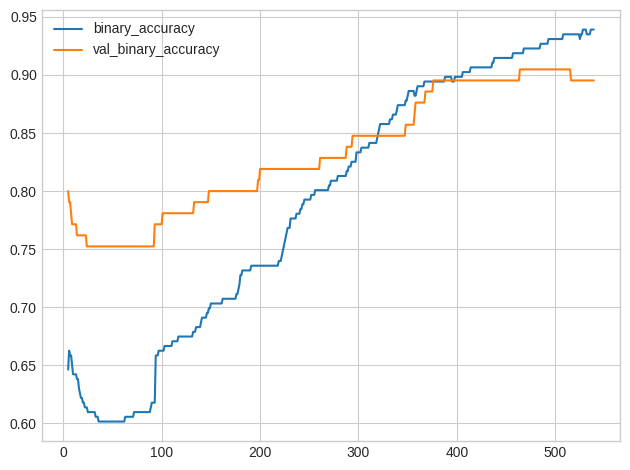

In [27]:
history_df = pd.DataFrame(history.history)

#Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))